In [1]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from earm2_flat import model

In [10]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [90]:
cmap = mpl.colors.ListedColormap(["#FFDBE5", "#FFFF00", "#1CE6FF", "#FF34FF",
                                  "#FF4A46", "#008941", "#006FA6", "#A30059"])
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


In [103]:
pars = np.load('sampled_kd_pars.npy')
# PSO calibrated parameter
par_fitted = np.load('calibrated_6572pars.npy')[0] 
par_mutated = np.copy(par_fitted)
par_mutated[83] = par_mutated[83]*0.7
pars = np.append(pars, [par_fitted, par_mutated], axis=0)
# Parameter names
# 83: bind_BidM_Bcl2M_kr
# 85: bind_BidM_BclxLM_kr
# 87: bind_BidM_Mcl1M_kr

zdata = np.log10(pars[:, 83] / pars[:, 82])
ydata = np.log10(pars[:, 85] / pars[:, 84])
xdata = np.log10(pars[:, 87] / pars[:, 86])

clus_labels = np.load('clus_labels_sampled_kd_spectral.npy')
# Adding a label to the "WT" and mutated parameter set to see differences
clus_labels = np.append(clus_labels, [8, 8])

<IPython.core.display.Javascript object>


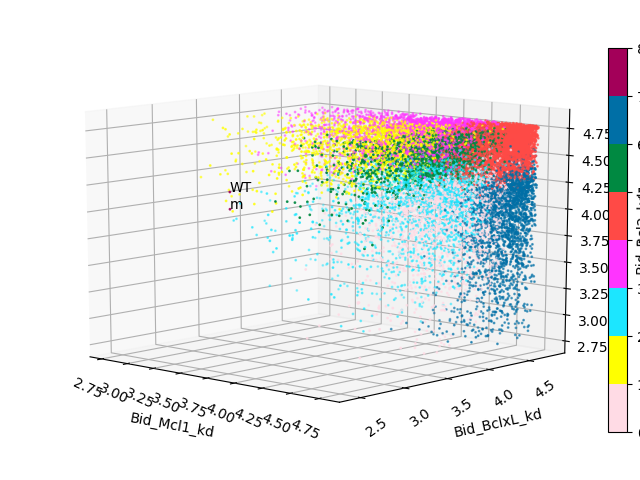

In [105]:
points = 1000
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')

ax.text(xdata[-2],ydata[-2],zdata[-2],  '%s' % ('WT'), size=10, zorder=1,  color='k') 
ax.text(xdata[-1],ydata[-1],zdata[-1],  '%s' % ('m'), size=10, zorder=1,  color='k') 


cax = ax.scatter3D(xdata[points:], ydata[points:], zdata[points:], c=clus_labels[points:], s=1, cmap=cmap);
# fig.colorbar(cax, extend='min')
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=bounds,
                                spacing='proportional',
                                orientation='vertical')
# plt.tight_layout()
ax.set_xlabel('Bid_Mcl1_kd')
ax.set_ylabel('Bid_BclxL_kd')
ax.set_zlabel('Bid_Bcl2_kd')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.xaxis.set_tick_params(rotation=-25)
ax.yaxis.set_tick_params(rotation=35)

ax.view_init(azim=45)
plt.tight_layout()
plt.savefig("bcl2_bclxl_mcl1_kd_log3dplot.pdf",format='pdf', bbox_inches='tight')

In [ ]:
from sklearn import manifold, datasets

In [ ]:
bcl2_data = np.log10(pars[:, 83] / pars[:, 82])
bclxl_data = np.log10(pars[:, 85] / pars[:, 84])
mcl1x_data = np.log10(pars[:, 87] / pars[:, 86])
baxM_data = np.log10(pars[:, 71] / pars[:, 70])

all_data = np.array([bcl2_data, bclxl_data, mcl1x_data, baxM_data])
all_data= all_data.T
all_data.shape

In [ ]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=50)
Y = tsne.fit_transform(all_data)
plt.clf()
plt.scatter(Y[:, 0], Y[:,1])
plt.savefig('bla')